<a href="https://colab.research.google.com/github/SaulBarajas/CS4650-HW5/blob/main/HW5_CS4650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install newsapi-python


In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import en_core_web_lg
import pickle
import pandas as pd
from newsapi import NewsApiClient
from collections import Counter
from string import punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='8c1b47d2a2d348e7b596679bd84de3f5')
articles = []
for i in range(1,6):
    temp = newsapi.get_everything(q='coronavirus',
                                  language='en',
                                  from_param='2022-03-12',
                                  to='2022-03-27',
                                  sort_by='relevancy',
                                  page=i)
    articles.append(temp)


In [ ]:
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [ ]:
data = []
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']

        data.append({'title':title,
                     'date':date,
                     'description':description,
                     'content':content})

df = pd.DataFrame(data)
df = df.dropna()
df.head()

,title,date,description,content
0,The Sunday Read: ‘Nurses Have Finally Learned ...,2022-03-27T10:00:07Z,"As the coronavirus spread, demand for nurses c...",There are a lot of ways to listen to The Daily...
1,"Rabbi Chaim Kanievsky, Venerated Talmudic Scho...",2022-03-18T20:26:55Z,"He initially insisted, “Canceling Torah study ...",Most significant was his ruling that instances...
2,Can Eric Adams Cheerlead New Yorkers Past the ...,2022-03-20T16:11:17Z,The mayor is singularly focused on bringing ba...,"Mr. Adams, a Democrat, has had regular convers..."
3,Moderna Asks F.D.A. to Authorize a Second Boos...,2022-03-18T09:08:37Z,The request is significantly broader than the ...,A man receiving a second booster of a coronavi...
4,China Reports Its First Covid Deaths in Over a...,2022-03-19T13:37:04Z,The two fatalities are the first coronavirus d...,Scarcely two months after the Omicron variant ...


In [ ]:
def get_keywords_eng(text):
  result = []
  pos_tag = ['VERB', 'NOUN', 'PROPN']

  for token in nlp_eng(text):
    if(token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
      continue
    if(token.pos_ in pos_tag):
      result.append(token.text)

  return result

In [ ]:
results = []
for content in df.content.values:
  results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results
df
df.to_excel("CovidArticles.xlsx")

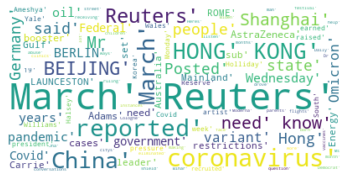

In [ ]:
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

0                [#lot, #ways, #listen, #Daily, #Heres]
1     [#ruling, #instances, #abuse, #children, #repo...
2     [#Mr., #Adams, #Democrat, #conversations, #citys]
3     [#Moderna, #man, #receiving, #booster, #corona...
4     [#months, #Omicron, #variant, #drove, #coronav...
                            ...                        
95    [#Williams, #Holliday, #State, #Ameshya, #recr...
96     [#People, #color, #establishing, #stand, #scene]
97    [#Rodgers, #Packers, #drafted, #round, #bickered]
98    [#Williams, #Holliday, #State, #Ameshya, #recr...
99    [#nations, #continue, #ease, #pandemic, #restr...
Name: keywords, Length: 100, dtype: object

,title,date,description,content
0,The Sunday Read: ‘Nurses Have Finally Learned ...,2022-03-27T10:00:07Z,"As the coronavirus spread, demand for nurses c...",There are a lot of ways to listen to The Daily...
1,"Rabbi Chaim Kanievsky, Venerated Talmudic Scho...",2022-03-18T20:26:55Z,"He initially insisted, “Canceling Torah study ...",Most significant was his ruling that instances...
2,Can Eric Adams Cheerlead New Yorkers Past the ...,2022-03-20T16:11:17Z,The mayor is singularly focused on bringing ba...,"Mr. Adams, a Democrat, has had regular convers..."
3,Moderna Asks F.D.A. to Authorize a Second Boos...,2022-03-18T09:08:37Z,The request is significantly broader than the ...,A man receiving a second booster of a coronavi...
4,China Reports Its First Covid Deaths in Over a...,2022-03-19T13:37:04Z,The two fatalities are the first coronavirus d...,Scarcely two months after the Omicron variant ...
...,...,...,...,...
95,Women’s March Madness: What to Watch on Day 2,2022-03-19T04:19:54Z,"If you’re looking for underdogs to root for, p...",Ameshya Williams-Holliday was recruited by a p...
96,"Exploring the Diversity, and Precariousness, o...",2022-03-18T17:57:15Z,"Fanny Herrero, the creator of “Call My Agent!,...",People of color were instrumental in establish...
97,"What Brady, Rodgers and Wilson’s Choices Could...",2022-03-15T02:00:59Z,"Tom Brady, Aaron Rodgers and Russell Wilson al...","Rodgers, 38, whom the Packers drafted in the f..."
98,Women’s N.C.A.A. Tournament: What to Watch on ...,2022-03-19T04:19:54Z,"If you’re looking for underdogs to root for, p...",Ameshya Williams-Holliday was recruited by a p...
